# Big-Data for Computational Finance - Assignment 1

## Introduction

### Project Objectives
The  objective of this project is to implement and solve the Markowitz portfolio optimization model using Python. This involves formulating the problem as a quadratic optimization task and exploring various constraints to analyze their impact on the efficient frontier.

### Tasks and Requirements
The project consists of the following tasks:

1. **Task 1: Solve the Original Problem**
   - Formulate and solve the Markowitz portfolio optimization problem with the standard constraints.
   - Plot the efficient frontier for different expected returns.

2. **Task 2: Modify the Investment Constraint**
   - Modify the total investment constraint to \(\mathbf{e}^T \mathbf{x} \leq 1\) and solve the optimization problem.
   - Compare the results with the original problem.

3. **Task 3: Change the Return Constraint**
   - Change the return constraint to \(\boldsymbol{\mu}^T \mathbf{x} \geq r\) and solve the optimization problem.
   - Analyze the impact of this modification on the efficient frontier.

4. **Task 4: Allow Short Selling**
   - Remove the non-negativity constraint (\(\mathbf{x} \geq \mathbf{0}\)) to allow short selling.
   - Solve the optimization problem and compare the results with previous tasks.

### Theoretical Foundation
The Markowitz model, also known as the mean-variance optimization model, aims to determine the optimal allocation of capital across a set of assets. The goal is to minimize the portfolio's risk (variance) for a given level of expected return. This optimization problem can be expressed mathematically as:

\[ 
\begin{align*}
\text{Minimize} & \quad \mathbf{x}^T \mathbf{C} \mathbf{x} \\
\text{Subject to} & \quad \boldsymbol{\mu}^T \mathbf{x} = r \\
& \quad \mathbf{e}^T \mathbf{x} = 1 \\
& \quad \mathbf{x} \geq \mathbf{0}
\end{align*}
\]

Where:
- \(\mathbf{x}\) is the vector of asset weights.
- \(\mathbf{C}\) is the covariance matrix of asset returns.
- \(\boldsymbol{\mu}\) is the vector of expected returns.
- \(r\) is the desired portfolio return.
- \(\mathbf{e}\) is a vector of ones ensuring the sum of weights is equal to 1.



# Importing Necessary Libraries

In [19]:
import numpy as np
import random 
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import solvers, matrix
from scipy.optimize import minimize

# Task no # 1 
### **part 1** 

In [20]:
import cvxpy as cp

# Define the given parameters (example)
n = 3  # Number of assets
mu = np.array([0.1, 0.2, 0.15])  # Expected returns
C = np.array([[0.005, -0.010, 0.004], [-0.010, 0.040, -0.002], [0.004, -0.002, 0.023]])  # Covariance matrix

# Define the vector e
e = np.ones(n)

# Define the range of r values
r_values = np.arange(2.0, 9.25, 0.25)

# Initialize lists to store sigma and mu values
sigma_values = []
mu_values = []

# Solve the optimization problem for each r
for r in r_values:
    # Define the optimization variable
    x = cp.Variable(n)

    # Define the objective function (minimize variance)
    objective = cp.Minimize(cp.quad_form(x, C))

    # Define the constraints
    constraints = [
        mu.T @ x == r,  # Expected return constraint
        e.T @ x == 1,   # Sum of fractions constraint
        x >= 0          # No short-selling constraint
    ]

    # Define the problem
    problem = cp.Problem(objective, constraints)

    # Solve the problem
    problem.solve()

  # Check if the problem was solved optimally
    if problem.status == cp.OPTIMAL:
        # Get the optimal x
        x_opt = x.value

        # Calculate sigma(x) and mu(x)
        sigma_x = np.sqrt(x_opt.T @ C @ x_opt)
        mu_x = mu.T @ x_opt
    else:
        # If the problem was not solved optimally, set sigma_x and mu_x to np.nan
        sigma_x = np.nan
        mu_x = np.nan

    # Store the values
    sigma_values.append(sigma_x)
    mu_values.append(mu_x)


# Convert lists to numpy arrays for plotting
sigma_values = np.array(sigma_values)
mu_values = np.array(mu_values)
t1_p1 = sigma_values
t1_p2 = mu_values


# Task # 1 
# **Plot  1**


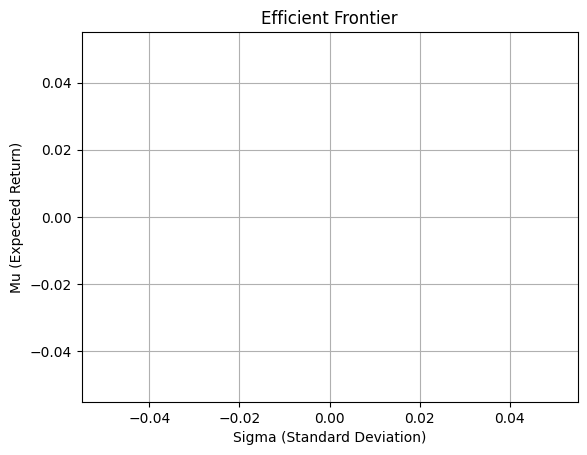

In [21]:
# Plot the results
#plt.figure(figsize=(10, 6))
plt.plot(t1_p1, t1_p2, marker='o')
plt.xlabel('Sigma (Standard Deviation)')
plt.ylabel('Mu (Expected Return)')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()

# Task no # 1 
### **part 2** 

In [22]:
# Number of assets
n = 10

# Replace dig1 with the second-to-last digit of your registration number
# Replace dig2 with the last digit of your registration number
dig1 = 0  # example, should be replaced with actual value
dig2 = 0  # example, should be replaced with actual value
dummyrepetitions = 10 * dig1 + dig2

# Perform dummy repetitions
for _ in range(dummyrepetitions):
    dummy = random.uniform(0, 1)

# Generate the correlation matrix Corr
Corr = np.array([[0] * n for _ in range(n)], dtype=float)
for i in range(n):
    for j in range(n):
        Corr[i][j] = (-1) ** abs(i - j) / (abs(i - j) + 1)

# Generate the standard deviations ssigma and expected returns mmu
ssigma = np.zeros((n, 1), dtype=float)
mmu = np.zeros((n, 1), dtype=float)
ssigma[0] = 2
mmu[0] = 3
for i in range(n - 1):
    ssigma[i + 1] = ssigma[i] + 2 * random.uniform(0, 1)
    mmu[i + 1] = mmu[i] + 1

# Generate the diagonal matrix ddiag
ddiag = np.zeros((n, n), dtype=float)
np.fill_diagonal(ddiag, ssigma.flatten())

# Calculate the covariance matrix C2 and the final matrix C
C2 = np.matmul(np.matmul(ddiag, Corr), ddiag)
C = 0.5 * (C2 + C2.T)

# Convert mmu to a 1D array for easier use in the optimization
mu = mmu.flatten()

# Define the vector e
e = np.ones(n)

# Define the range of r values
r_values = np.arange(2.0, 9.25, 0.25)  # series of r increasing 0.25 from question

# Initialize lists to store sigma and mu values
sigma_values = []
mu_values = []

# Solve the optimization problem for each r
for r in r_values:
    # Define the optimization variable
    x = cp.Variable(n)

    # Define the objective function (minimize variance)
    objective = cp.Minimize(cp.quad_form(x, C))

    # Define the constraints
    constraints = [
        mu.T @ x == r,  # Expected return constraint
        e.T @ x == 1,   # Sum of fractions constraint
        x >= 0          # No short-selling constraint
    ]

    # Define the problem
    problem = cp.Problem(objective, constraints)

    # Solve the problem
    problem.solve()

    # Check if the problem was solved optimally
    if problem.status == cp.OPTIMAL:
        # Get the optimal x
        x_opt = x.value

        # Calculate sigma(x) and mu(x)
        sigma_x = np.sqrt(x_opt.T @ C @ x_opt)
        mu_x = mu.T @ x_opt
    else:
        # If the problem was not solved optimally, set sigma_x and mu_x to np.nan
        sigma_x = np.nan
        mu_x = np.nan

    # Store the values
    sigma_values.append(sigma_x)
    mu_values.append(mu_x)

# Convert lists to numpy arrays for plotting
sigma_values = np.array(sigma_values)
mu_values = np.array(mu_values)
t1p2_p1 = sigma_values
t1p2_p2 = mu_values

# Task # 1 
# **Plot  2**

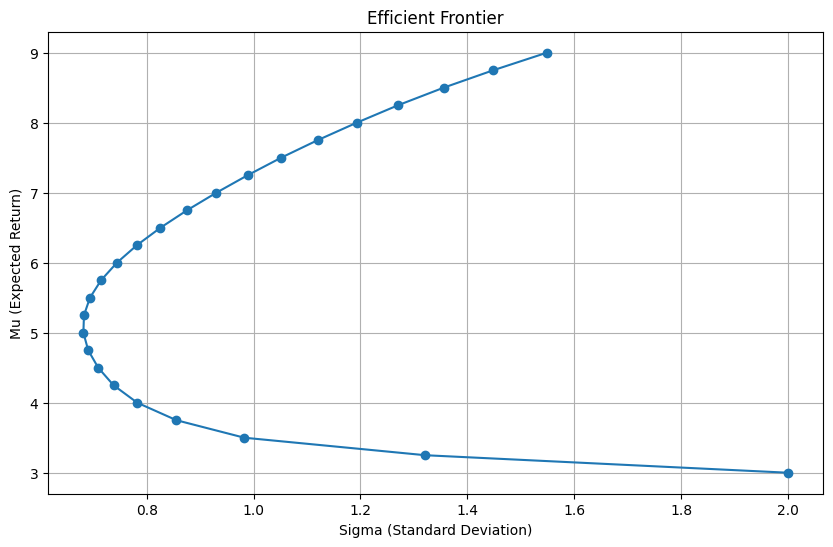

In [23]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t1p2_p1, t1p2_p2, marker='o')
plt.xlabel('Sigma (Standard Deviation)')
plt.ylabel('Mu (Expected Return)')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()

# Task no # 2

In [24]:
# Number of assets
n = 10

# Replace dig1 with the second-to-last digit of your registration number
# Replace dig2 with the last digit of your registration number
dig1 = 0  # example, should be replaced with actual value
dig2 = 0  # example, should be replaced with actual value
dummyrepetitions = 10 * dig1 + dig2

# Perform dummy repetitions
for _ in range(dummyrepetitions):
    dummy = random.uniform(0, 1)

# Generate the correlation matrix Corr
Corr = np.array([[0] * n for _ in range(n)], dtype=float)
for i in range(n):
    for j in range(n):
        Corr[i][j] = (-1) ** abs(i - j) / (abs(i - j) + 1)

# Generate the standard deviations ssigma and expected returns mmu
ssigma = np.zeros((n, 1), dtype=float)
mmu = np.zeros((n, 1), dtype=float)
ssigma[0] = 2
mmu[0] = 3
for i in range(n - 1):
    ssigma[i + 1] = ssigma[i] + 2 * random.uniform(0, 1)
    mmu[i + 1] = mmu[i] + 1

# Generate the diagonal matrix ddiag
ddiag = np.zeros((n, n), dtype=float)
np.fill_diagonal(ddiag, ssigma.flatten())

# Calculate the covariance matrix C2 and the final matrix C
C2 = np.matmul(np.matmul(ddiag, Corr), ddiag)
C = 0.5 * (C2 + C2.T)

# Convert mmu to a 1D array for easier use in the optimization
mu = mmu.flatten()

# Define the vector e
e = np.ones(n)

# Define the range of r values
r_values = np.arange(2.0, 9.25, 0.25)  # series of r increasing 0.25 from question

# Initialize lists to store sigma and mu values
sigma_values = []
mu_values = []

# Solve the optimization problem for each r
for r in r_values:
    # Define the optimization variable
    x = cp.Variable(n)

    # Define the objective function (minimize variance)
    objective = cp.Minimize(cp.quad_form(x, C))

    # Define the constraints
    constraints = [
        mu.T @ x == r,  # Expected return constraint
        e.T @ x <= 1,   # Sum of fractions constraint allowing for less than full investment
        x >= 0          # No short-selling constraint
    ]

    # Define the problem
    problem = cp.Problem(objective, constraints)

    # Solve the problem
    problem.solve()

    # Check if the problem was solved optimally
    if problem.status == cp.OPTIMAL:
        # Get the optimal x
        x_opt = x.value

        # Calculate sigma(x) and mu(x)
        sigma_x = np.sqrt(x_opt.T @ C @ x_opt)
        mu_x = mu.T @ x_opt
    else:
        # If the problem was not solved optimally, set sigma_x and mu_x to np.nan
        sigma_x = np.nan
        mu_x = np.nan

    # Store the values
    sigma_values.append(sigma_x)
    mu_values.append(mu_x)

# Convert lists to numpy arrays for plotting
sigma_values = np.array(sigma_values)
mu_values = np.array(mu_values)

t2_p1 = sigma_values
t2_p2 = mu_values

# Task # 2 
# **Plot**

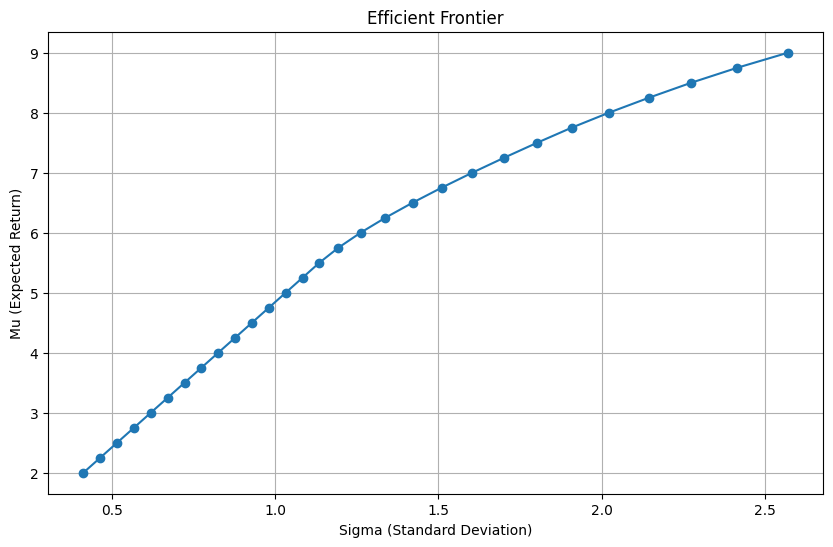

In [25]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t2_p1, t2_p2, marker='o')
plt.xlabel('Sigma (Standard Deviation)')
plt.ylabel('Mu (Expected Return)')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()

# Comparing plots of Task 1(plot 2) and Task 2

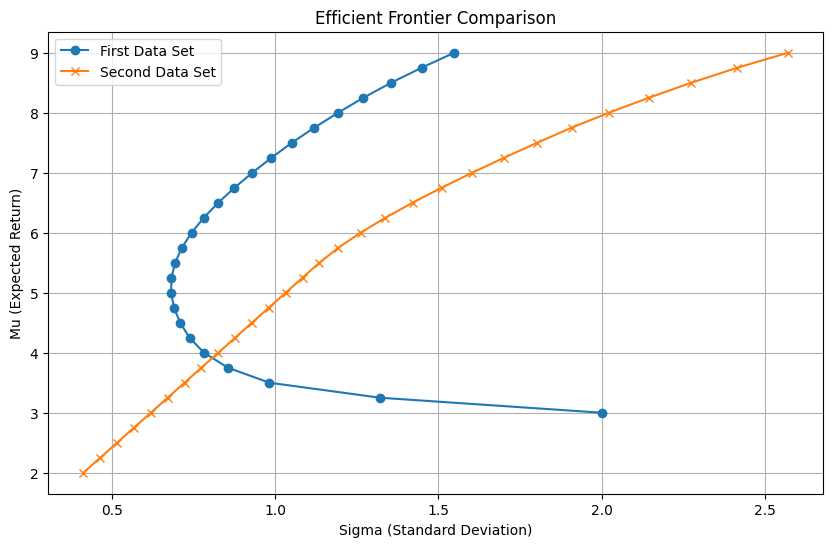

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(t1p2_p1, t1p2_p2, marker='o', label='First Data Set')
plt.plot(t2_p1, t2_p2, marker='x', label='Second Data Set')
plt.xlabel('Sigma (Standard Deviation)')
plt.ylabel('Mu (Expected Return)')
plt.title('Efficient Frontier Comparison')
plt.grid(True)
plt.legend()
plt.show()

# Task no # 3

In [27]:
# Number of assets
n = 10

# Replace dig1 with the second-to-last digit of your registration number
# Replace dig2 with the last digit of your registration number
dig1 = 0  # example, should be replaced with actual value
dig2 = 0  # example, should be replaced with actual value
dummyrepetitions = 10 * dig1 + dig2

# Perform dummy repetitions
for _ in range(dummyrepetitions):
    dummy = random.uniform(0, 1)

# Generate the correlation matrix Corr
Corr = np.array([[0] * n for _ in range(n)], dtype=float)
for i in range(n):
    for j in range(n):
        Corr[i][j] = (-1) ** abs(i - j) / (abs(i - j) + 1)

# Generate the standard deviations ssigma and expected returns mmu
ssigma = np.zeros((n, 1), dtype=float)
mmu = np.zeros((n, 1), dtype=float)
ssigma[0] = 2
mmu[0] = 3
for i in range(n - 1):
    ssigma[i + 1] = ssigma[i] + 2 * random.uniform(0, 1)
    mmu[i + 1] = mmu[i] + 1

# Generate the diagonal matrix ddiag
ddiag = np.zeros((n, n), dtype=float)
np.fill_diagonal(ddiag, ssigma.flatten())

# Calculate the covariance matrix C2 and the final matrix C
C2 = np.matmul(np.matmul(ddiag, Corr), ddiag)
C = 0.5 * (C2 + C2.T)

# Convert mmu to a 1D array for easier use in the optimization
mu = mmu.flatten()

# Define the vector e
e = np.ones(n)

# Define the range of r values
r_values = np.arange(2.0, 9.25, 0.25)  # series of r increasing 0.25 from question

# Initialize lists to store sigma and mu values
sigma_values = []
mu_values = []

# Solve the optimization problem for each r
for r in r_values:
    # Define the optimization variable
    x = cp.Variable(n)

    # Define the objective function (minimize variance)
    objective = cp.Minimize(cp.quad_form(x, C))

    # Define the constraints
    constraints = [
        mu.T @ x >= r,  # Expected return constraint (at least r)
        e.T @ x == 1,   # Sum of fractions constraint
        x >= 0          # No short-selling constraint
    ]

    # Define the problem
    problem = cp.Problem(objective, constraints)

    # Solve the problem
    problem.solve()

    # Check if the problem was solved optimally
    if problem.status == cp.OPTIMAL:
        # Get the optimal x
        x_opt = x.value

        # Calculate sigma(x) and mu(x)
        sigma_x = np.sqrt(x_opt.T @ C @ x_opt)
        mu_x = mu.T @ x_opt
    else:
        # If the problem was not solved optimally, set sigma_x and mu_x to np.nan
        sigma_x = np.nan
        mu_x = np.nan

    # Store the values
    sigma_values.append(sigma_x)
    mu_values.append(mu_x)

# Convert lists to numpy arrays for plotting
sigma_values = np.array(sigma_values)
mu_values = np.array(mu_values)

t3_p1 = sigma_values
t3_p2 = mu_values

# Task # 3
# **Plot**

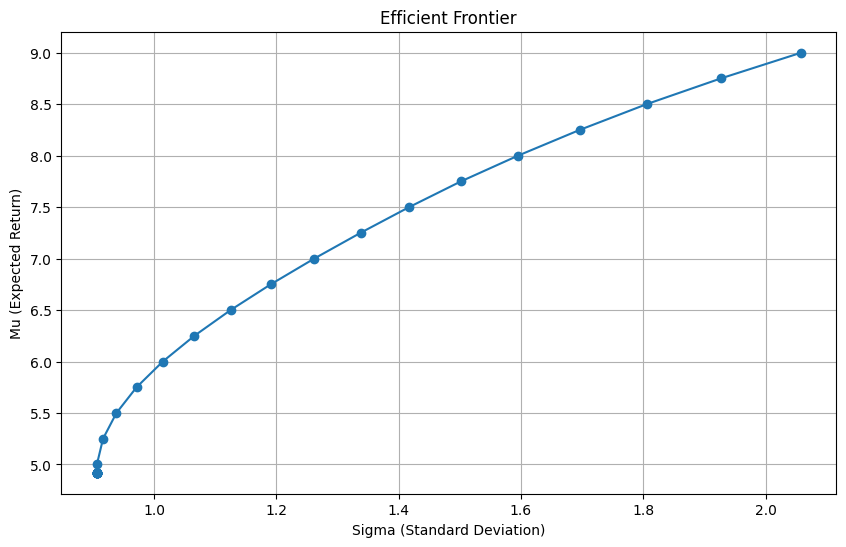

In [28]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t3_p1, t3_p2, marker='o')
plt.xlabel('Sigma (Standard Deviation)')
plt.ylabel('Mu (Expected Return)')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()

# Comparing plots of Task 1(plot 2) and Task 3

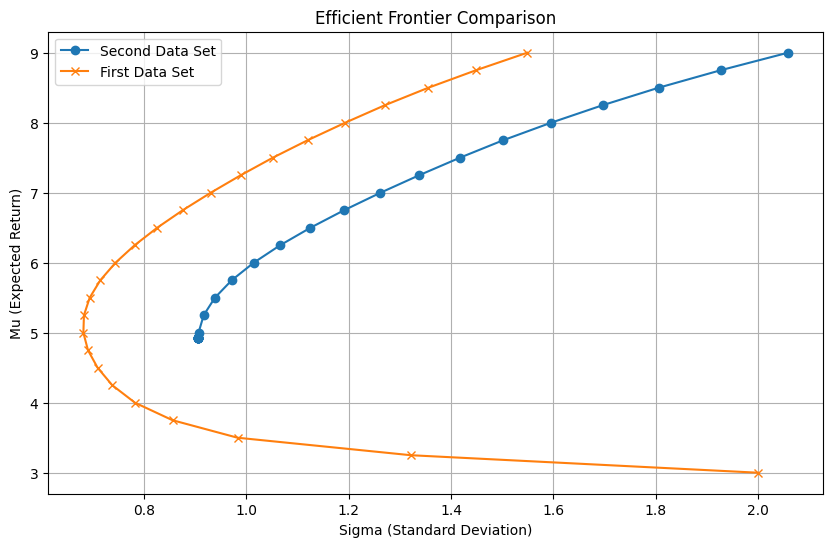

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(t3_p1, t3_p2, marker='o', label='Second Data Set')
plt.plot(t1p2_p1, t1p2_p2, marker='x', label='First Data Set')
plt.xlabel('Sigma (Standard Deviation)')
plt.ylabel('Mu (Expected Return)')
plt.title('Efficient Frontier Comparison')
plt.grid(True)
plt.legend()
plt.show()

# Task no # 4

In [30]:
# Number of assets
n = 10

# Replace dig1 with the second-to-last digit of your registration number
# Replace dig2 with the last digit of your registration number
dig1 = 0  # example, should be replaced with actual value
dig2 = 0  # example, should be replaced with actual value
dummyrepetitions = 10 * dig1 + dig2

# Perform dummy repetitions
for _ in range(dummyrepetitions):
    dummy = random.uniform(0, 1)

# Generate the correlation matrix Corr
Corr = np.array([[0] * n for _ in range(n)], dtype=float)
for i in range(n):
    for j in range(n):
        Corr[i][j] = (-1) ** abs(i - j) / (abs(i - j) + 1)

# Generate the standard deviations ssigma and expected returns mmu
ssigma = np.zeros((n, 1), dtype=float)
mmu = np.zeros((n, 1), dtype=float)
ssigma[0] = 2
mmu[0] = 3
for i in range(n - 1):
    ssigma[i + 1] = ssigma[i] + 2 * random.uniform(0, 1)
    mmu[i + 1] = mmu[i] + 1

# Generate the diagonal matrix ddiag
ddiag = np.zeros((n, n), dtype=float)
np.fill_diagonal(ddiag, ssigma.flatten())

# Calculate the covariance matrix C2 and the final matrix C
C2 = np.matmul(np.matmul(ddiag, Corr), ddiag)
C = 0.5 * (C2 + C2.T)

# Convert mmu to a 1D array for easier use in the optimization
mu = mmu.flatten()

# Define the vector e
e = np.ones(n)

# Define the range of r values
r_values = np.arange(2.0, 9.25, 0.25)  # series of r increasing 0.25 from question

# Initialize lists to store sigma and mu values
sigma_values = []
mu_values = []

# Solve the optimization problem for each r
for r in r_values:
    # Define the optimization variable
    x = cp.Variable(n)

    # Define the objective function (minimize variance)
    objective = cp.Minimize(cp.quad_form(x, C))

    # Define the constraints
    constraints = [
        mu.T @ x == r,  # Expected return constraint
        e.T @ x == 1    # Sum of fractions constraint
        # Removed x >= 0 to allow short-selling
    ]

    # Define the problem
    problem = cp.Problem(objective, constraints)

    # Solve the problem
    problem.solve()

    # Check if the problem was solved optimally
    if problem.status == cp.OPTIMAL:
        # Get the optimal x
        x_opt = x.value

        # Calculate sigma(x) and mu(x)
        sigma_x = np.sqrt(x_opt.T @ C @ x_opt)
        mu_x = mu.T @ x_opt
    else:
        # If the problem was not solved optimally, set sigma_x and mu_x to np.nan
        sigma_x = np.nan
        mu_x = np.nan

    # Store the values
    sigma_values.append(sigma_x)
    mu_values.append(mu_x)

# Convert lists to numpy arrays for plotting
sigma_values = np.array(sigma_values)
mu_values = np.array(mu_values)

t4_p1 = sigma_values
t4_p2 = mu_values

# Task # 4
# **Plot**

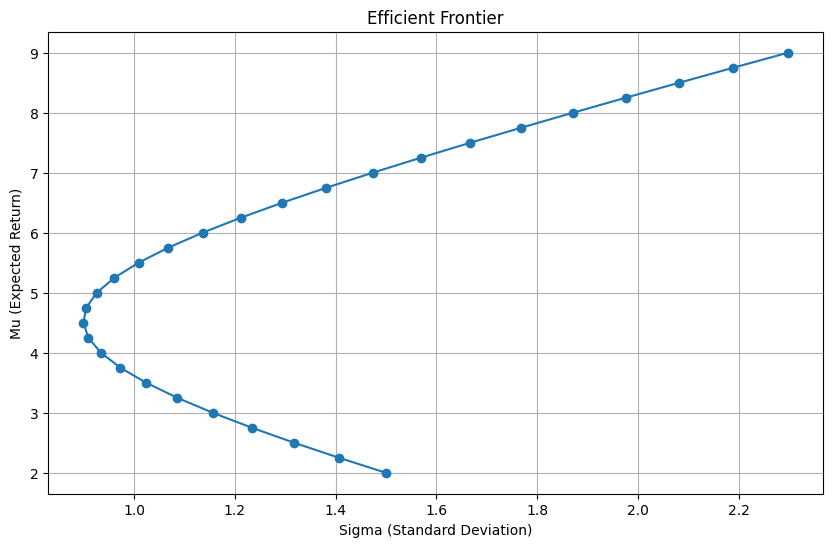

In [31]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t4_p1, t4_p2, marker='o')
plt.xlabel('Sigma (Standard Deviation)')
plt.ylabel('Mu (Expected Return)')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()

# Comparing plots of Task 1(plot 2) and Task 4

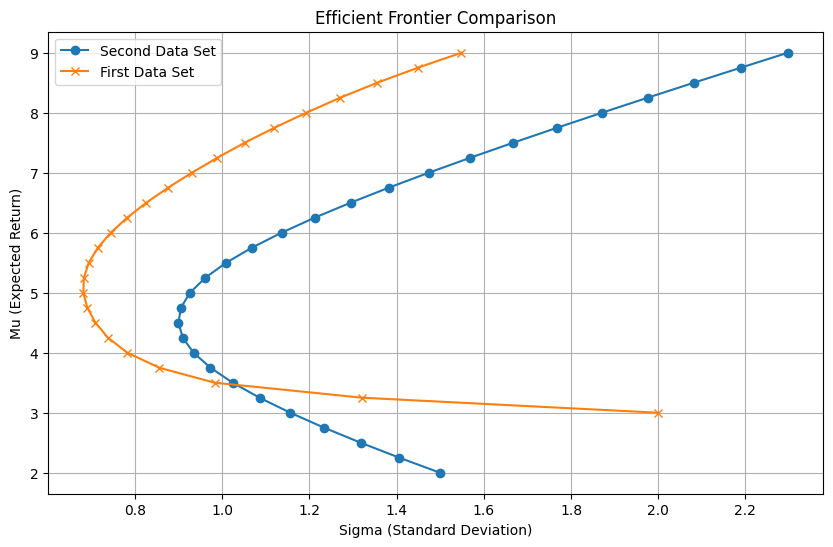

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(t4_p1, t4_p2, marker='o', label='Second Data Set')
plt.plot(t1p2_p1, t1p2_p2, marker='x', label='First Data Set')
plt.xlabel('Sigma (Standard Deviation)')
plt.ylabel('Mu (Expected Return)')
plt.title('Efficient Frontier Comparison')
plt.grid(True)
plt.legend()
plt.show()